In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [4]:
data.drop(['Unnamed: 0','ID','Name','Games'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
Sex       271116 non-null object
Age       271116 non-null float64
Height    271116 non-null float64
Weight    271116 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 24.8+ MB


In [6]:
data.Year = data.Year.astype('str')

In [7]:
features = data.drop(['Medal'],axis=1)
target = data.Medal

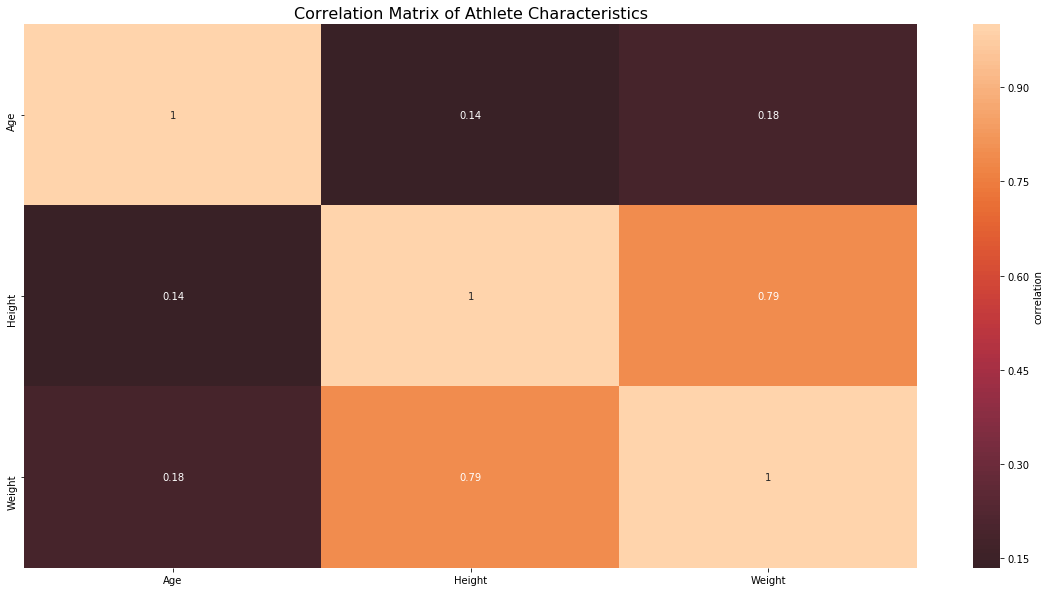

In [8]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), center=0, annot = True,
            cbar_kws = {'label' : 'correlation'})
plt.title('Correlation Matrix of Athlete Characteristics', fontsize = 16)
plt.show()

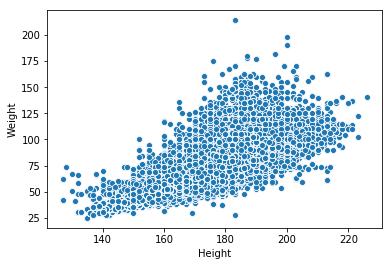

In [9]:
sns.scatterplot(data['Height'],data['Weight'])

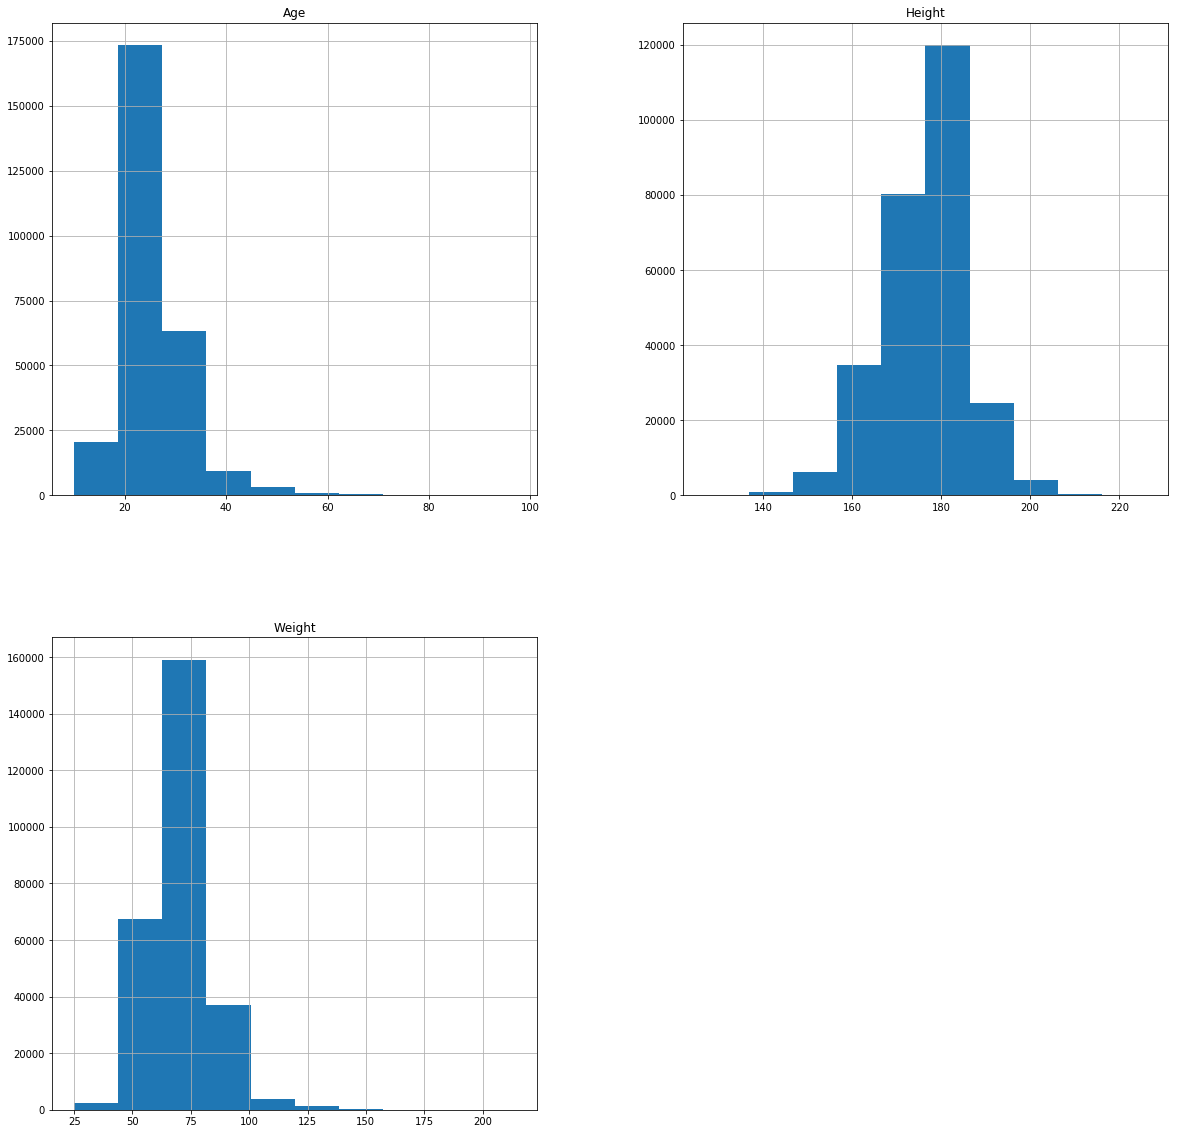

In [10]:
features.hist(figsize=(20,20))
plt.show()

In [11]:
log_transform=['Weight','Height','Age']
for column in log_transform:
    features[column] = np.log(features[column])
features.describe()

,Age,Height,Weight
count,271116.000000,271116.000000,271116.000000
mean,3.212432,5.168229,4.247225
std,0.224094,0.054370,0.179468
min,2.302585,4.844187,3.218876
25%,3.091042,5.135798,4.127134
50%,3.178054,5.181784,4.290459
75%,3.332205,5.192957,4.317488
max,4.574711,5.420535,5.365976


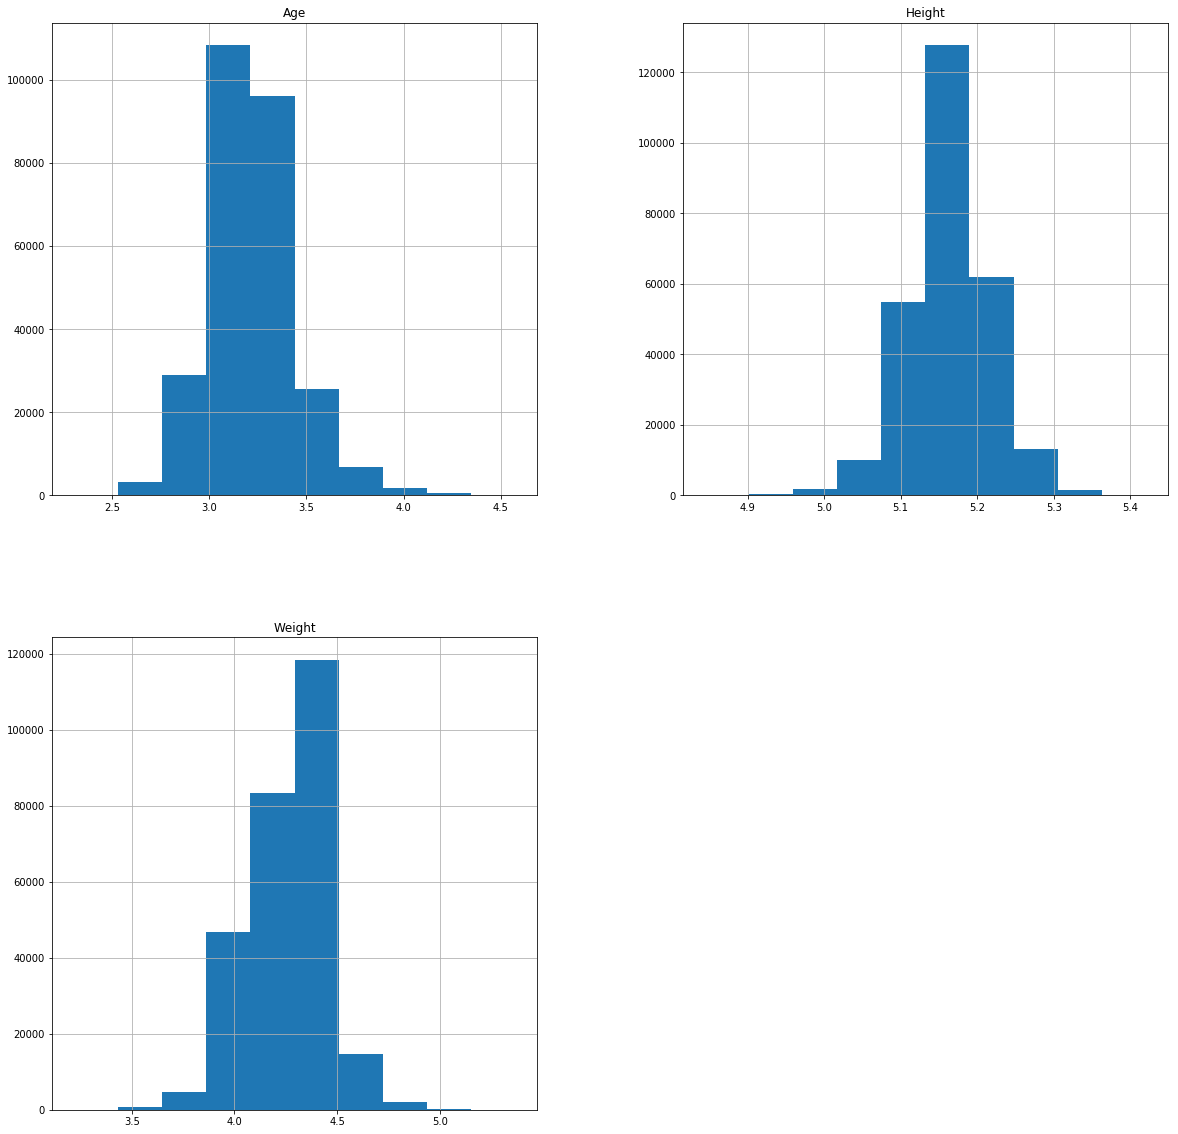

In [12]:
features.hist(figsize=(20,20));

In [13]:
for column in features.describe().columns:
    features[column] = (features[column]-np.mean(features[column]))/(np.sqrt(np.var(features[column])))
features.describe()

,Age,Height,Weight
count,2.711160e+05,2.711160e+05,2.711160e+05
mean,2.063040e-12,-1.427687e-11,6.378904e-12
std,1.000002e+00,1.000002e+00,1.000002e+00
min,-4.060125e+00,-5.959934e+00,-5.729984e+00
25%,-5.416904e-01,-5.964803e-01,-6.691463e-01
50%,-1.534083e-01,2.492996e-01,2.409047e-01
75%,5.344781e-01,4.548042e-01,3.915091e-01
max,6.079075e+00,4.640529e+00,6.233708e+00


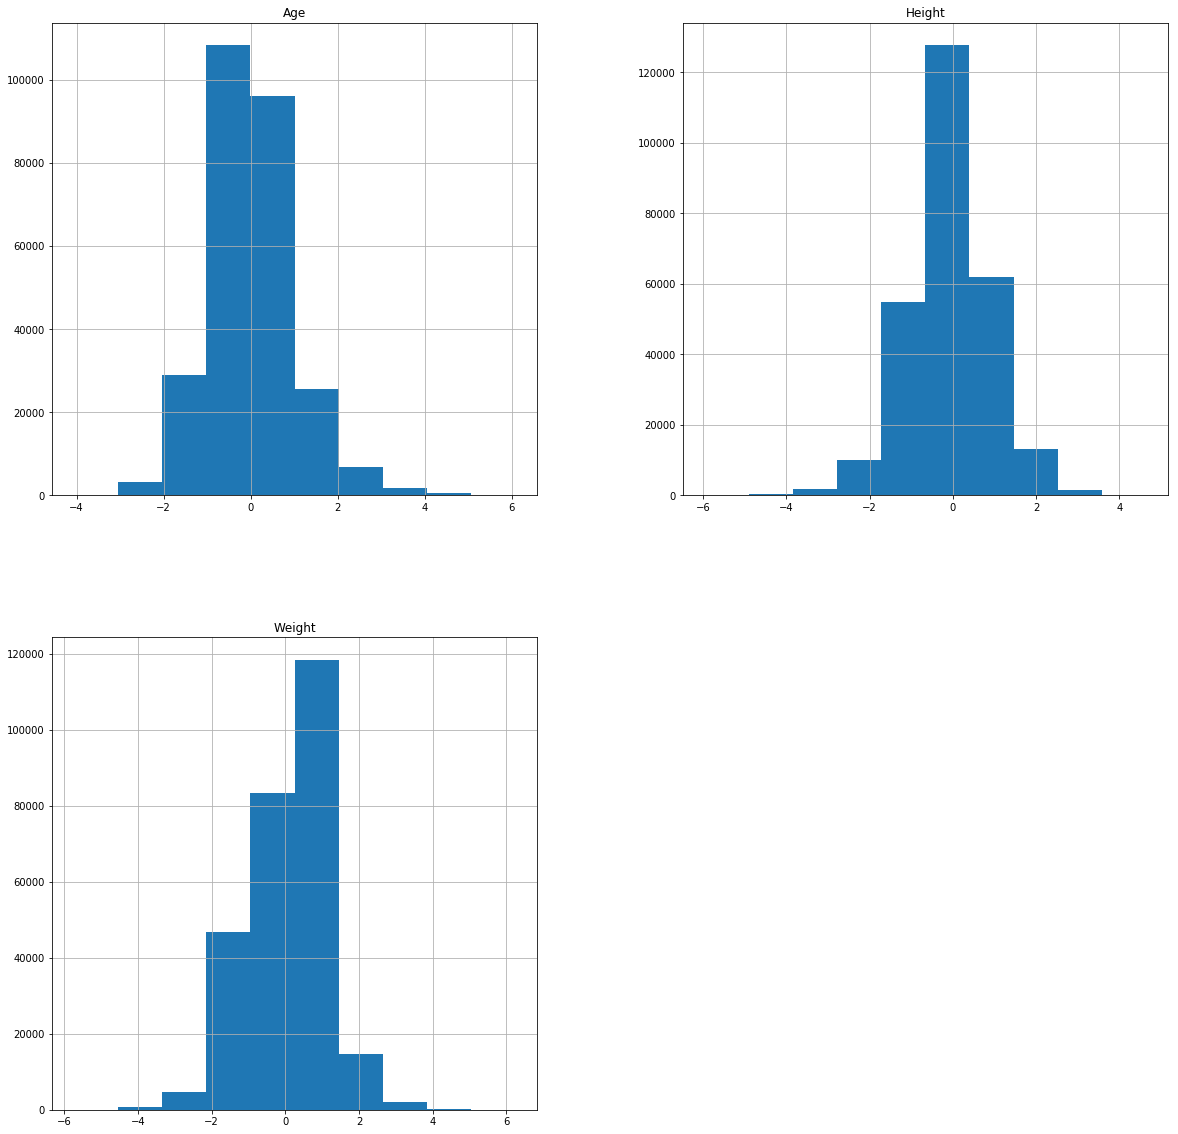

In [14]:
features.hist(figsize=(20,20));

In [15]:
X = pd.get_dummies(features)
X.head()

,Age,Height,Weight,Sex_F,Sex_M,Team_30. Februar,Team_A North American Team,Team_Acipactli,Team_Acturus,Team_Afghanistan,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,-0.153408,0.454804,0.751119,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.343328,-0.596480,-0.851852,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.153408,0.352339,0.316716,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.400885,0.352339,0.316716,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.749283,0.958739,0.888707,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y = pd.get_dummies(target)
Y.head()

,Bronze,Gold,None,Silver
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [31]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.models import Sequential
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [33]:
encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)

In [35]:
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2329, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [27]:
embedding_size = 128
input_ = Input(shape=(2329,))
x = Embedding(20000, embedding_size)(input_)
x = LSTM(25, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=input_, outputs=x)

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2329)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 2329, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 2329, 25)          15400     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
__________

In [30]:
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

W1117 11:04:56.350067 140736009462656 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 183003 samples, validate on 20334 samples
Epoch 1/2


InvalidArgumentError: indices[4,0] = -1 is not in [0, 20000)
	 [[{{node embedding_3/embedding_lookup}}]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import timeit
from sklearn.metrics import confusion_matrix

start = timeit.timeit()
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(X_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
end = timeit.timeit()
print("Accuracy:",acc_train)
print("Accuracy:",acc_test)
print ("Time Taken:", end - start)

cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

In [ ]:
import itertools
def final_confusion_matrix(cnf_matrix, y, title):
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()

In [ ]:
final_confusion_matrix(cm_knn, target, 'KNearestNeighbors')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print(accuracy_score(y_train, y_pred_dt_train))
print(accuracy_score(y_test, y_pred_dt))

In [ ]:
pretty_confusion_matrix(cm_dt, target, 'Decision Tree Classifier')